In [26]:
import pandas as pd
import numpy as np
import math
import scipy.stats as si
PATH = 'https://raw.githubusercontent.com/hmku/mwtc-2020/master/MWTC-platform-release-1.1.1/data/normalized_price_paths/{}_{}.csv'

In [29]:
n = 1
dfs = [{'history': pd.read_csv(PATH.format('history', i), index_col=0, header=0).transpose(), 
        'trading': pd.read_csv(PATH.format('trading', i), index_col=0, header=0).transpose()}
       for i in range(n)]
dfs

[{'history':                A           B          C           D           E           F  \
  0      93.339227   92.758675  76.310948  134.862406  121.352739  307.466850   
  1      93.754714   92.271097  75.975936  133.839470  121.801187  308.719590   
  2      92.949430   91.963232  76.437248  132.777294  121.305722  306.743513   
  3      92.386261   91.693289  76.718947  132.016991  121.759779  308.127726   
  4      92.851503   91.214735  76.426019  131.012683  120.910414  309.537807   
  ...          ...         ...        ...         ...         ...         ...   
  1795  100.620792   99.645514  99.095019  100.510042   99.721102  101.802008   
  1796   99.679377  100.027050  99.954433   99.981936  100.055451  102.437784   
  1797   99.239868  100.348189  99.054865   99.365975  100.373771  102.962102   
  1798   99.874762  100.001275  98.190607  100.007968  100.765002  102.066621   
  1799  100.409590   99.623853  99.236732  100.559569  100.410556  100.859786   
  
              

In [13]:
# helper function for plotting
def plot(df, *args, cs=False):
    if len(args) == 0:
        args = list(df.columns)
    dft = pd.DataFrame()
    for arg in args:
        dft[arg] = df[arg].cumsum() if cs else df[arg]
    dft.plot(figsize=(15, 10), y=args)

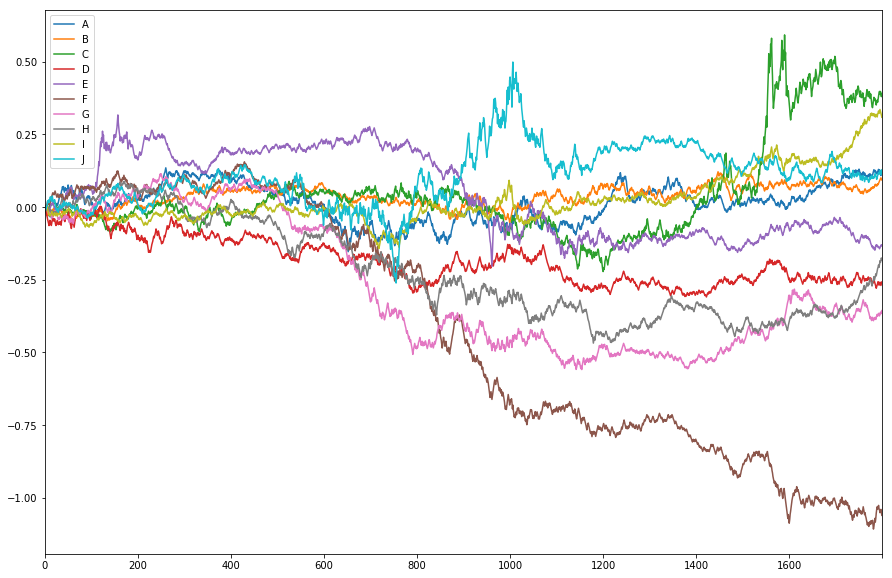

In [30]:
plot(dfs[0]['history'].pct_change(), cs=True)

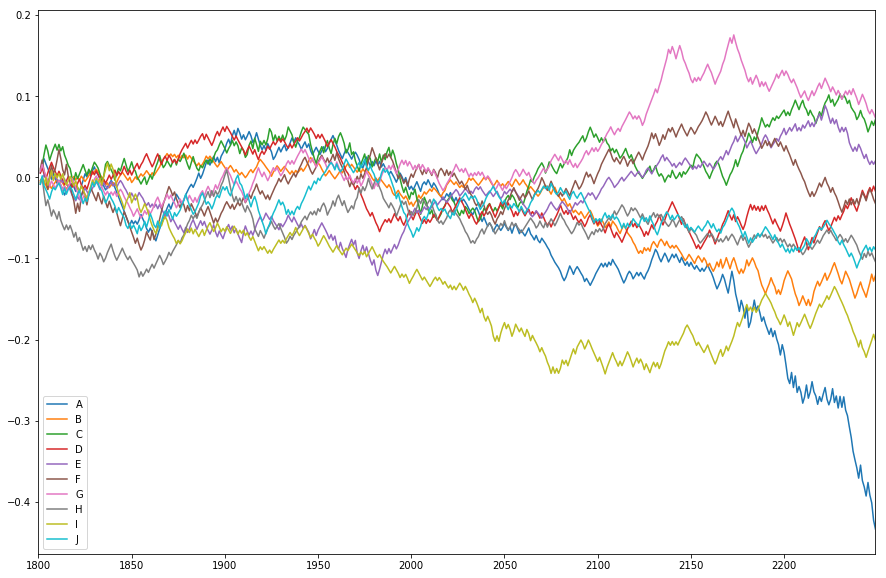

In [31]:
plot(dfs[0]['trading'].pct_change(), cs=True)

In [44]:
dfs[0]['trading'].pct_change().std()*math.sqrt(1799)

A    0.303019
B    0.197690
C    0.277426
D    0.230952
E    0.215380
F    0.275134
G    0.231548
H    0.230355
I    0.246272
J    0.235112
dtype: float64

In [18]:
def price(S, K, T, r, sigma, option='call'):
    
    # S: spot price
    # K: strike price
    # T: time to maturity
    # r: interest rate
    # sigma: volatility of underlying asset
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
        
    return result